In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

<ipython-input-7-035ea3bb07b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')


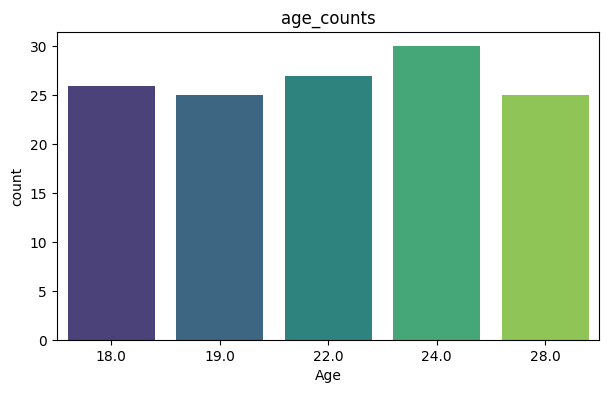

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: count, dtype: int64

In [7]:
#the most 5 age in data
age_counts=dataset['Age'].value_counts().head()

plt.figure(figsize=(7,4))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

<ipython-input-8-511c914d245a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')


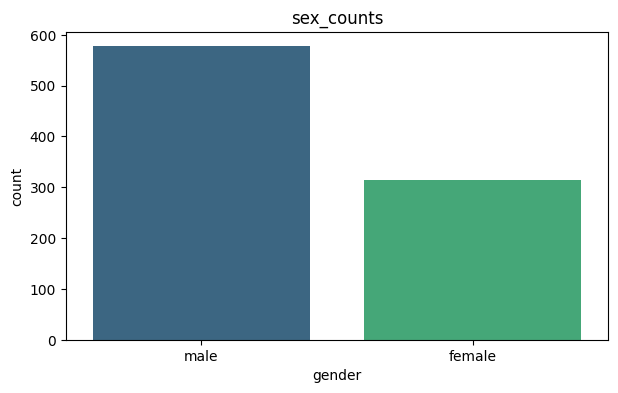

In [8]:
sex_counts=dataset['Sex'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

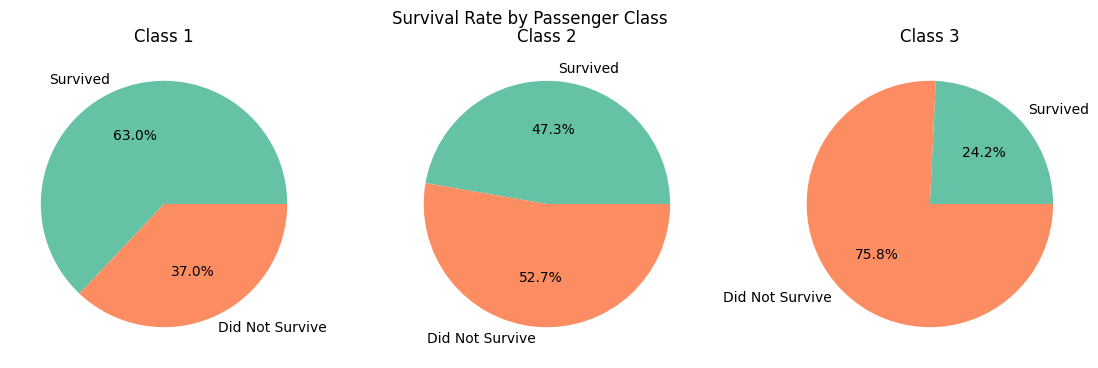

In [9]:
# Create a DataFrame with survival rates per class
survival_rate = dataset.groupby('Pclass')['Survived'].mean()

# Plot
fig, axes = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Survival Rate by Passenger Class')

for i, pclass in enumerate(survival_rate.index):
    axes[i].pie([survival_rate[pclass], 1-survival_rate[pclass]], labels=['Survived', 'Did Not Survive'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
    axes[i].set_title(f'Class {pclass}')

plt.show()

<ipython-input-10-b71ce86dc250>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=dataset, palette='viridis')


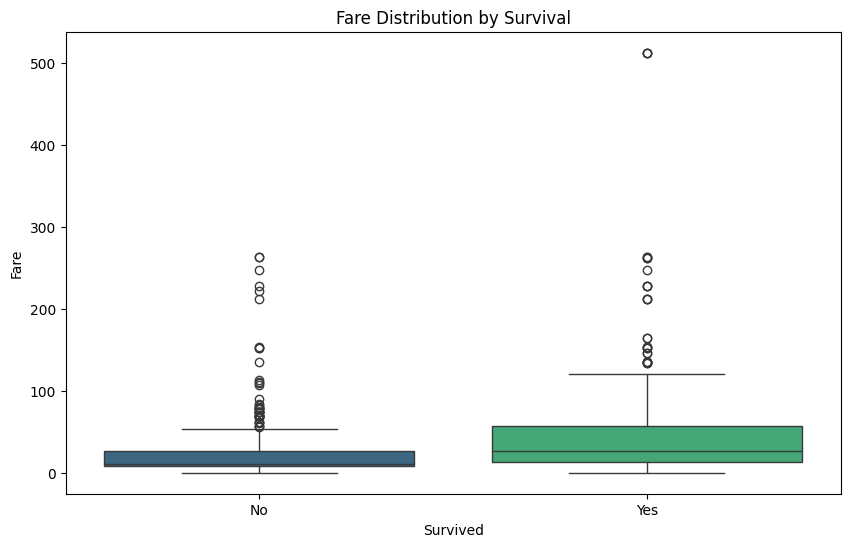

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=dataset, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [11]:
dataset["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
dataset["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

### The Fare of the tickets can be categorized in four different classes based on the fare price. Let say the classes are Low, Medium, High and VIP.

### *  **`Low: 0-20`**
### *  **`Medium: 20-60`**
### *  **`High: 60-100`**
### *  **`VIP: >100`**

In [13]:
# Low-Fare-Price
((dataset["Fare"]>0) & (dataset["Fare"]<20)).value_counts()

Fare
True     500
False    391
Name: count, dtype: int64

In [14]:
# Medium-Fare-Price
((dataset["Fare"]>20) & (dataset["Fare"]<60)).value_counts()

Fare
False    637
True     254
Name: count, dtype: int64

In [15]:
# High-Fare-Price
((dataset["Fare"]>60) & (dataset["Fare"]<100)).value_counts()

Fare
False    822
True      69
Name: count, dtype: int64

In [16]:
# VIP-Fare-Price
(dataset["Fare"]>100).value_counts()

Fare
False    838
True      53
Name: count, dtype: int64

In [17]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
dataset['Low-Fare-Price'] = 0
dataset['Medium-Fare-Price'] = 0
dataset['High-Fare-Price'] = 0
dataset['VIP-Fare-Price'] = 0

In [19]:
dataset.loc[dataset['Fare'] <=20 , 'Low-Fare-Price'] = 1

In [20]:
dataset.loc[(dataset['Fare'] >=20) & (dataset['Fare'] <= 60), 'Medium-Fare-Price'] = 1

In [21]:
dataset.loc[(dataset['Fare'] >=60) & (dataset['Fare'] <= 100), 'High-Fare-Price'] = 1

In [22]:
dataset.loc[dataset['Fare'] >=100, 'VIP-Fare-Price'] = 1

In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Low-Fare-Price,Medium-Fare-Price,High-Fare-Price,VIP-Fare-Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0


In [24]:
# Aggregate survival rates for each fare range
fare_ranges = ['Low-Fare-Price', 'Medium-Fare-Price', 'High-Fare-Price', 'VIP-Fare-Price']
survival_rates = {}

for fare_range in fare_ranges:
    total = dataset[fare_range].sum()
    survived = dataset[dataset['Survived'] == 1][fare_range].sum()
    survival_rate = survived / total
    survival_rates[fare_range] = survival_rate

# Convert to DataFrame for plotting
survival_df = pd.DataFrame(list(survival_rates.items()), columns=['Fare Range', 'Survival Rate'])


In [25]:
survival_df

,Fare Range,Survival Rate
0,Low-Fare-Price,0.277670
1,Medium-Fare-Price,0.460630
2,High-Fare-Price,0.623188
3,VIP-Fare-Price,0.735849


<ipython-input-26-8172fe316c33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fare Range', y='Survival Rate', data=survival_df, palette='viridis')


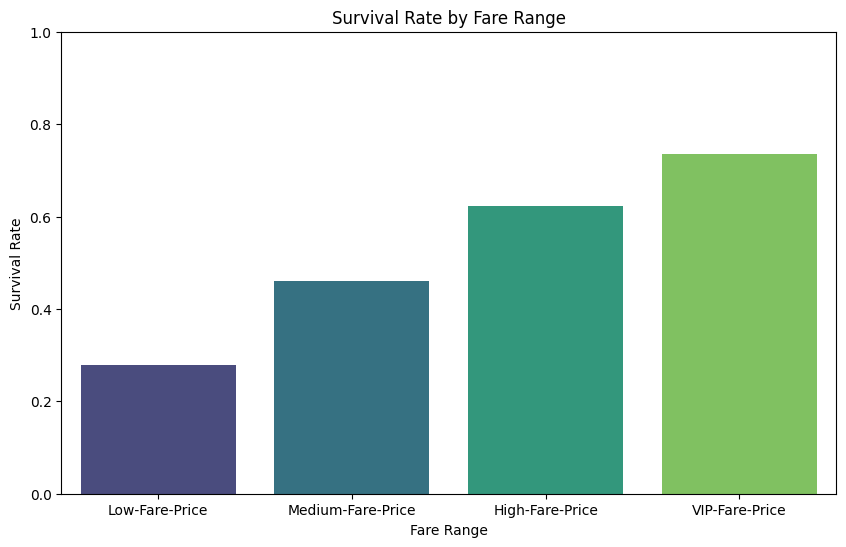

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Fare Range', y='Survival Rate', data=survival_df, palette='viridis')
plt.title('Survival Rate by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # To show the rates as percentages
plt.show()

In [27]:
dataset["Embarked"].isnull().sum()

2

In [28]:
dataset["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
dataset["Embarked"].fillna("S", inplace=True)

In [30]:
dataset["Age"].isnull().sum()

177

In [31]:
from sklearn.impute import SimpleImputer

# Reshaping the 'Age' column to a 2D array
age_values = dataset['Age'].values.reshape(-1, 1)

imputer = SimpleImputer(strategy = 'mean').fit(age_values)
dataset['Age'] = imputer.transform(age_values)

In [32]:
dataset.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Low-Fare-Price         0
Medium-Fare-Price      0
High-Fare-Price        0
VIP-Fare-Price         0
dtype: int64

In [33]:
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [34]:
dataset['Sex'] = dataset['Sex'].replace({'male':1,'female':0})

In [35]:
dataset['Embarked'] = dataset['Embarked'].replace({'S':1,'C':2,'Q':3})

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Low-Fare-Price,Medium-Fare-Price,High-Fare-Price,VIP-Fare-Price
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0


In [37]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Low-Fare-Price',
       'Medium-Fare-Price', 'High-Fare-Price', 'VIP-Fare-Price'],
      dtype='object')

In [38]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [39]:
dataset.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Low-Fare-Price,Medium-Fare-Price,High-Fare-Price,VIP-Fare-Price
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.106811,-0.255496,0.099710,0.142594,0.182033
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.045702,0.652835,-0.301669,-0.348217,-0.393856
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.116569,0.187864,-0.054575,-0.120271,-0.152189
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.007461,-0.115321,0.022828,0.139511,0.039569
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,-0.059961,-0.359494,0.243968,0.224448,0.031346
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,-0.078665,-0.376642,0.299571,0.050402,0.157709
Embarked,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,1.000000,0.049660,-0.112672,0.033469,0.073539
Low-Fare-Price,-0.255496,0.652835,0.187864,-0.115321,-0.359494,-0.376642,0.049660,1.000000,-0.739021,-0.339077,-0.294324
Medium-Fare-Price,0.099710,-0.301669,-0.054575,0.022828,0.243968,0.299571,-0.112672,-0.739021,1.000000,-0.182951,-0.158805
High-Fare-Price,0.142594,-0.348217,-0.120271,0.139511,0.224448,0.050402,0.033469,-0.339077,-0.182951,1.000000,-0.072863


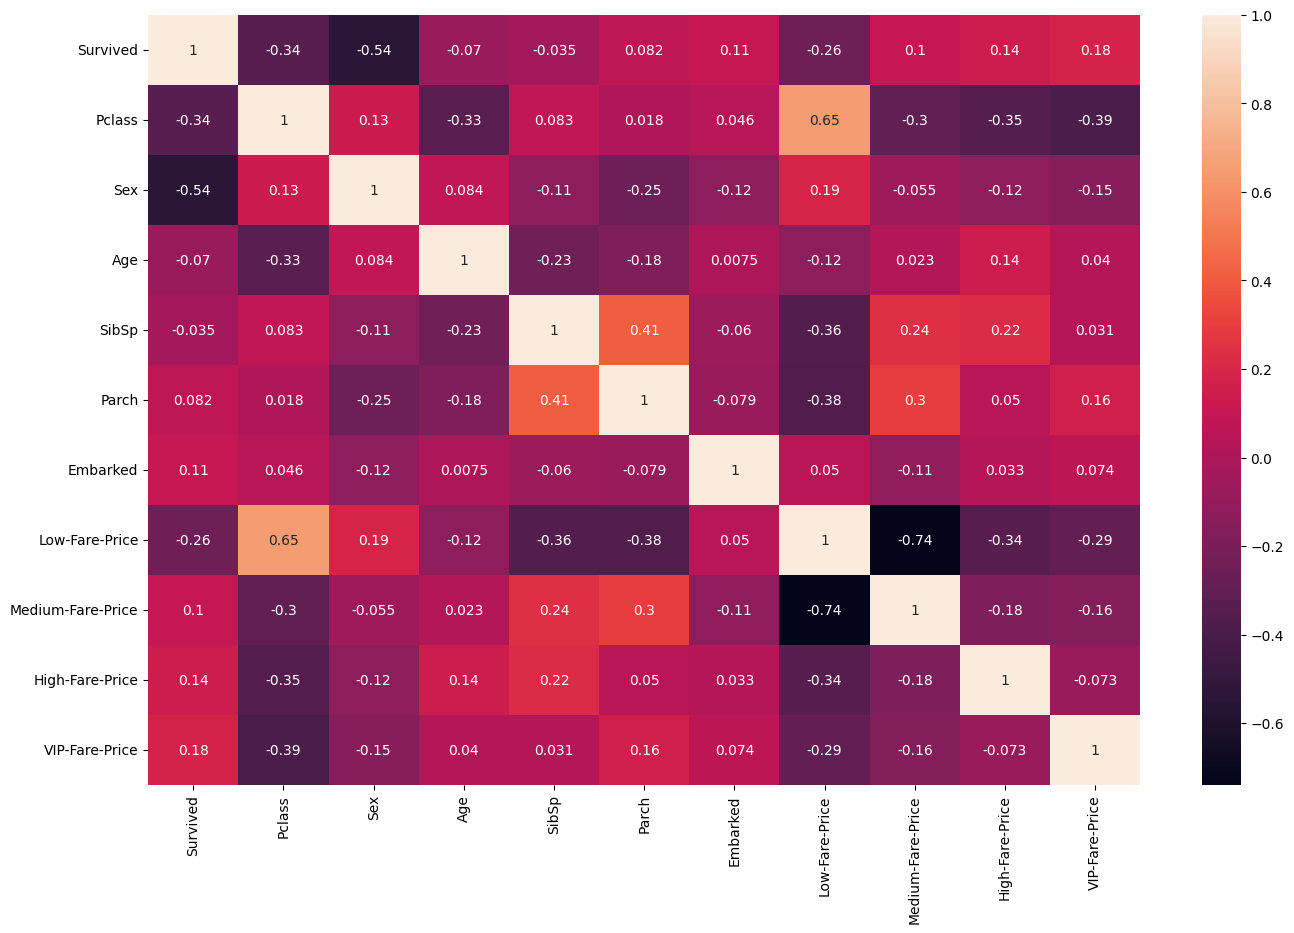

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [41]:
## We have discovered how different fare ranges positively impact whether passengers survived or not

In [42]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [43]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Low-Fare-Price,Medium-Fare-Price,High-Fare-Price,VIP-Fare-Price
0,3,1,22.0,1,0,1,1,0,0,0
1,1,0,38.0,1,0,2,0,0,1,0
2,3,0,26.0,0,0,1,1,0,0,0
3,1,0,35.0,1,0,1,0,1,0,0
4,3,1,35.0,0,0,1,1,0,0,0


In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [46]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Low-Fare-Price,Medium-Fare-Price,High-Fare-Price,VIP-Fare-Price
599,1,1,49.000000,1,0,2,0,1,0,0
830,3,0,15.000000,1,0,2,1,0,0,0
306,1,0,29.699118,0,0,2,0,0,0,1
231,3,1,29.000000,0,0,1,1,0,0,0
845,3,1,42.000000,0,0,1,1,0,0,0


In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
classifier = RandomForestClassifier(n_jobs = -1, n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70  8]
 [15 41]]


0.8283582089552238